# Statistical Data Analysis II

## Project 2

### Ada Hryniewicka

### Gibbs Sampling

The goal of this project was to write Gibbs sampler for Bayesian network presented on the graph below and find P(R=T|W=T,S=T). 





![picture](https://docs.google.com/uc?id=1w_2MBvDcfkuvYVaytE028LTBK-ks9gRE)

### Task 1
Computing the formulas.
Where R=True and R'=False and other symbols by analogy.

$P(C|R,S,W)= P(C|R,S)= \frac{P(R,S|C)P(C)}{P(R,S)}= \frac{P(R|C)P(S|C)P(C)}{P(R|C)P(S|C)P(C)+P(R|C')P(S|C')P(C')}= \frac{0.8*0.1*0.5}{0.8*0.1*0.5+0.2*0.5*0.5}= 0.4444$

$P(C|R',S,W)= P(C|R',S)= \frac{P(R',S|C)P(C)}{P(R',S)}= \frac{P(R'|C)P(S|C)P(C)}{P(R'|C)P(S|C)P(C)+P(R'|C')P(S|C')P(C')}= \frac{0.2*0.1*0.5}{0.2*0.1*0.5+0.8*0.5*0.5}=0.0476 $

$P(R|C,S,W)= \frac{P(W|R,C,S)P(R|C,S)}{P(W|C,S)}= \frac{P(W|R,S)P(R|C)}{P(W|R,S)P(R|C)+P(W|R',S)P(R'|C)}= \frac{0.99*0.8}{0.99*0.8+0.9*0.2}= 0.8148$

$P(R|C',S,W)= \frac{P(W|R,C',S)P(R|C',S)}{P(W|C',S)}= \frac{P(W|R,S)P(R|C')}{P(W|R,S)P(R|C')+P(W|R',S)P(R'|C')}= \frac{0.99*0.2}{0.99*0.2+0.9*0.8}= 0.2157$

In [3]:
import numpy as np
import scipy as sp
import matplotlib.pyplot as plt
import pandas as pd
import random 
import seaborn as sns
import statsmodels.api as sm
sns.set()
random.seed(10)

### Task 2 & 3
Implementation of the Gibbs sampler for the given Bayesian network and drawing 100 samples from the joint probability distribution P (R, C | S = T, W = T) and estimation of the marginal probability of rain, given that the sprinkler is on and the grass is wet P(R=T|S=T,W =T).

In [4]:
def transition_func(p):
    "Binomial distribution over certain probability"
    return np.random.binomial(1,p)


In [5]:
def choose_prob(cloud_rain, cloud, rain):
    "Choosing probability depending value: if cloud_rain is True, update rain values; if cloud_rain is False update cloud values"
    if (cloud_rain):
        if(rain): 
            prob = 0.4444
        else: 
            prob = 0.0476
    else: 
        if(cloud):
            prob = 0.8148
        else: 
            prob = 0.2157
    return prob  
        


In [6]:
def gibbs_step(cloud_rain, cloud, rain):
    "Choosing the step with certain probability"
    prob = choose_prob(cloud_rain, cloud, rain)
    newstate = (transition_func(prob) == 1)

    if (cloud_rain):
        cloud = newstate
    else: 
        rain = newstate

    return (cloud, rain)  


In [7]:
def cloud_rain_selector(cloud, rain):
    "Randomly selecting cloud or rain variable, if cloud = 1 means true, otherwise false  "
    number_0_1 = random.randint(0,1)
    cloud_rain = (number_0_1 == 1) 
    return (gibbs_step(cloud_rain, cloud, rain)) 

In [8]:
def gibbs_iteration(nIter, cloud, rain):
    "Implementing final iteration in gibbs sampler"
    cloud_array = [cloud]
    rain_array = [rain]

    for i in range(1,nIter):
        state_cloud, state_rain = cloud_rain_selector(cloud_array[i-1], rain_array[i-1])
        
        cloud_array.append(state_cloud)
        rain_array.append(state_rain)

    return cloud_array, rain_array 


In [9]:
def joint_prob(test_cloud, test_rain):
    "Create a list with 1 when Cloudy = T and Rain = T and 0 otherwise"
    cloudy_and_rained = []
    for i in range(len(test_cloud)):
        if test_cloud[i] == True and test_rain[i] == True: 
            cloudy_and_rained.append(1)
        else: 
            cloudy_and_rained.append(0)
    return cloudy_and_rained


In [10]:
nIteration = 100
test_cloud, test_rain = gibbs_iteration(nIteration,True,True)
cloudy_and_rained = joint_prob(test_cloud, test_rain)
print("P(R,C|W=T,S=T)=", np.mean(cloudy_and_rained))
print("P(R=T|S=T,W=T)=", np.mean(test_rain))

P(R,C|W=T,S=T)= 0.23
P(R=T|S=T,W=T)= 0.43


### Task 4
Drawing 50,000 samples instead of 100 using the Gibbs sampler.

In [11]:
nIteration = 50000
#two run of a sampler for further comparison
test_cloud1, test_rain1 = gibbs_iteration(nIteration,True,True)
test_cloud2, test_rain2 = gibbs_iteration(nIteration,True,True)


In [12]:
cloudy_and_rained1 = joint_prob(test_cloud1, test_rain1)
cloudy_and_rained2 = joint_prob(test_cloud2, test_rain2)

### Task 5
The plot of the relative frequencies of R = T and C = T up to each iteration t against t, for two independent runs of the sampler.

In [13]:
def burn_in_plot_data(cloudy_and_rained):
    "Preparing the list of the relative frequencies of R = T and C = T up to each iteration"
    iteration = 0 
    joint_prob = []
    for i in range(len(cloudy_and_rained)):
        iteration += 1
        joint_prob.append(sum(cloudy_and_rained[0:i]) / iteration)

    return joint_prob

cloudy_rained1_plot = burn_in_plot_data(cloudy_and_rained1)
cloudy_rained2_plot = burn_in_plot_data(cloudy_and_rained2)

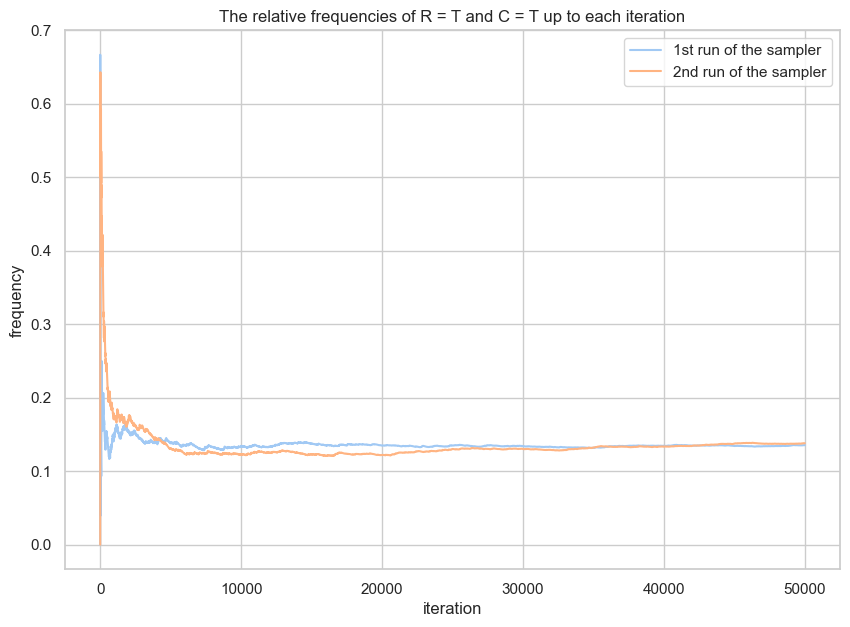

In [14]:
t = np.arange(0,nIteration,1)
sns.set_theme(style="whitegrid", palette="pastel")
plt.figure(figsize=(10,7))
plt.plot(t,cloudy_rained1_plot, label='1st run of the sampler')
plt.plot(t,cloudy_rained2_plot, label='2nd run of the sampler')
plt.xlabel('iteration')
plt.ylabel('frequency')
plt.title('The relative frequencies of R = T and C = T up to each iteration')
plt.legend()

Suggestion about burning-in time based on this plot is 25000. This is when the plot converges. 

### Task 6 
Investigate the auto-correlation among the samples. Plot for the lag-k auto-correlation.

In [41]:
#lists of relative frequencies as imput for correlation computation
cloud_lag = burn_in_plot_data(test_cloud1)
rain_lag = burn_in_plot_data(test_rain1)
#correlation depending on lags
lags = np.arange(1,5000)
acorr_cloudy = sm.tsa.acf(cloud_lag, nlags = len(lags)-1)
acorr_rain = sm.tsa.acf(rain_lag, nlags = len(lags)-1)

Text(0, 0.5, 'correlation')

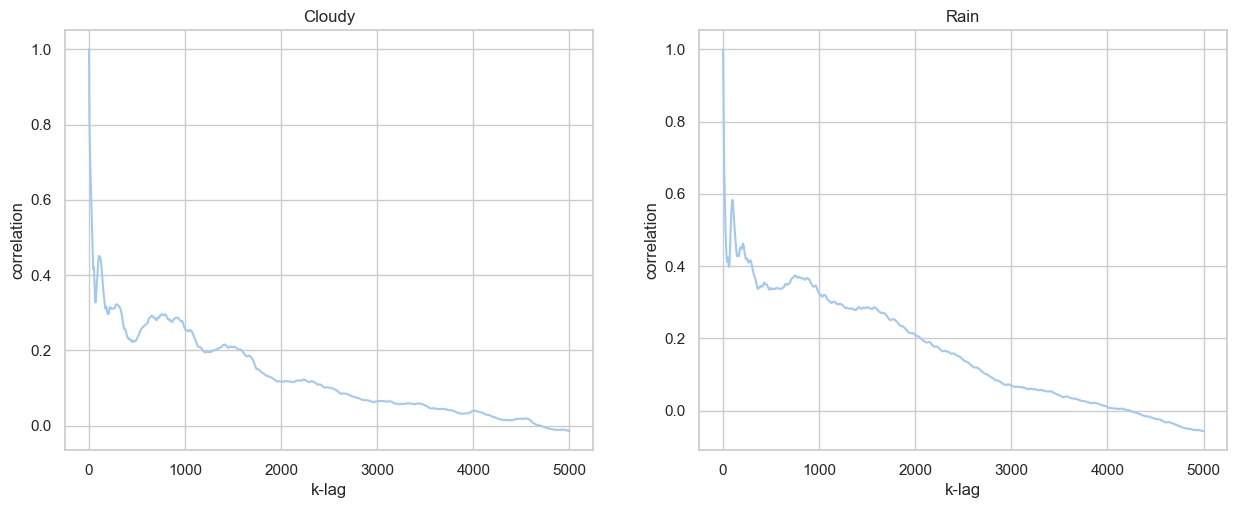

In [42]:
plt.figure(figsize=(15,12))
plt.subplot(221)
plt.plot(lags, acorr_cloudy, '-')
plt.title('Cloudy')
plt.xlabel('k-lag')
plt.ylabel('correlation')
plt.subplot(222)
plt.plot(lags, acorr_rain, '-')
plt.title('Rain')
plt.xlabel('k-lag')
plt.ylabel('correlation')


Based on the plots thinning-out parameter was chosen to 1000. 

### Task 7 
Implementing suggested burn-in and thin-out for sampler.

In [17]:
def implement_parameters(burn, thin, results):
    "Implementation of burning-in parameter and thinning-out"
    
    index_list = np.arange(burn, len(results), thin)
    res_list = [results[i] for i in index_list]

    return res_list


### Task 8 
Re-estimation of P (R = T | S = T, W = T).

In [43]:
burn_in = 25000
thining_out = 1000
#sample_100 = random.sample(implement_parameters(burn_in,thining_out,test_rain1), 10)
print("After adjusting burn-in and thinning-out parameters:", np.mean(implement_parameters(burn_in,thining_out,test_rain1))) 
print("Result for the same probability obtained in task 3:", np.mean(test_rain))
print("Result for 50k samples wihout any modyfications of sampler is:", np.mean(test_rain1))

After adjusting burn-in and thinning-out parameters: 0.32
Result for the same probability obtained in task 3: 0.43
Result for 50k samples wihout any modyfications of sampler is: 0.31766


Value after implementing the burn-in and thinning-out is smaller and closer to value from 50k sampler without modyfications which indicates it is closer to true value.

### Task 9
Computing P (R = T | S = T, W = T) analytically and comparision to the sampling estimate. 

Analytical computation of P(R=T|W=T,S=T), where R=T is R and R=F is R' and other symbols by analogy.

$P(R|S,W)= \frac{P(R,S,W)}{P(S,W)}= \frac{P(R,S,W|C)P(C)+P(R,A,W|C')P(C')}{P(S,W)}= \frac{P(W|S,R)P(S|C)P(R|C)P(C)+P(W|S,R)P(S|C')P(R|C')P(C')}{P(W|S,R)P(S|C)P(R|C)P(C)+P(W|S,R)P(S|C')P(R|C')P(C')+P(W|S,R')P(S|C)P(R'|C)P(C)+P(W|S,R')P(S|C')P(R'|C')P(C')}=\frac{0.99*0.1*0.8*0.5+0.99*0.5*0.2*0.5}{0.99*0.1*0.8*0.5+0.99*0.5*0.2*0.5+0.9*0.1*0.2*0.5+0.9*0.5*0.8*0.5}= 0.3204 $

Analytical result is similar to computed value which indicates that chosen parameters for burn-in and thinning-out were properly done and improved previously computed value. Moreover, the value for basic sampler for 50k samples also indicates proper working of the sampler.

### Gelman Rubin Diagnostic

Steps for G-R Diagnostics:
1. Minimum 2 runs of sampler (chains) is needed. I'll use ones form tasks 4&5.
2. Only taking values further than suggested burn-in.
3. Calculate variance in each chain (W) and variance between chains (B).
Because I will do it only for 2 chains the formulas are explicite used in example. They are not general forms for more chains.  

    $ W = \frac{1}{2}(var_{1}^{2}+var_{2}^{2})$  

    $ B = n * ((\theta_{1}-\theta)^{2}+(\theta_{2}-\theta)^{2})$   

    where $\theta$ is a mean.  

    $\theta = 0.5(\theta_{1}+\theta_{2})$  

4. Calculate variance of $\theta$ as weithed sum between W and B  

    $var(\theta) = (1- \frac{1}{n})*W + \frac{1}{n*B}$  

5. Final reduction factor is computed via  

    $R = \sqrt{\frac{var(\theta)}{W}}$

In [44]:
n = len(cloudy_rained1_plot[burn_in:len(cloudy_rained1_plot)])
W = 0.5*(np.std(cloudy_rained1_plot[burn_in:len(cloudy_rained1_plot)])**2+np.std(cloudy_rained2_plot[burn_in:len(cloudy_rained2_plot)])**2)
mean1 = np.mean(cloudy_rained1_plot[burn_in:len(cloudy_rained1_plot)])
mean2 = np.mean(cloudy_rained2_plot[burn_in:len(cloudy_rained2_plot)])
mean = 0.5*(mean1+mean2)
B = n * ((mean1 - mean)**2 + (mean2 - mean)**2)
var_theta = (1 - 1/n) * W + 1/n*B
print("Gelmen-Rubin Diagnostic: ", np.sqrt(var_theta/W))


Gelmen-Rubin Diagnostic:  1.0324610243789016


The result is confirming that burn-in time was chosen correctly and the plot converges because we want this number to be close to 1. This would indicate that the between chain variance is small. If between chain variance is small, that means both chains are mixing around the stationary distribution. Values substantially above 1 indicate lack of convergence. 